In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Get Dataset

In [3]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('Movielens_Dataset/u.data', sep = '\t', names = column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique()

943

In [7]:
df['item_id'].nunique()

1682

In [8]:
movies_title = pd.read_csv('Movielens_Dataset/u.item', sep = '\|', header = None)

In [9]:
movies_title.shape

(1682, 24)

In [10]:
movies_title = movies_title[[0, 1]]

In [11]:
movies_title.columns = ['item_id', 'title']

In [12]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
df = pd.merge(df, movies_title, on = 'item_id')

In [14]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [16]:
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
� k�ldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [17]:
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [18]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [19]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [20]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
ratings['Num of Ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [22]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,Num of Ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


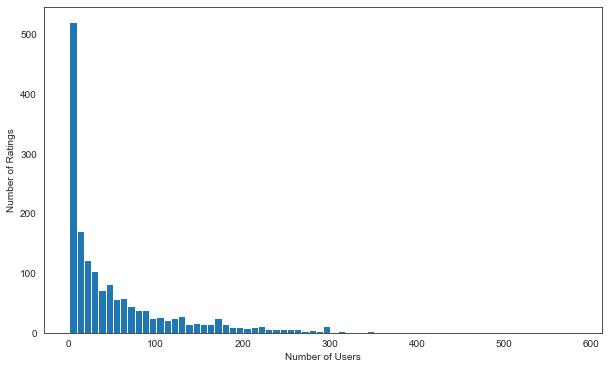

In [23]:
plt.figure(figsize = (10, 6))
plt.hist(ratings['Num of Ratings'], bins = 70)
plt.xlabel('Number of Users')
plt.ylabel('Number of Ratings')
plt.show()

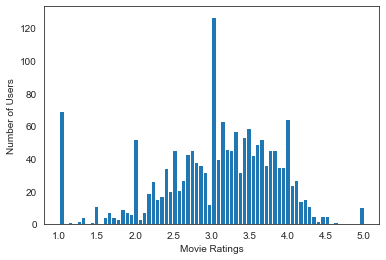

In [24]:
plt.hist(ratings['rating'], bins = 70)
plt.xlabel('Movie Ratings')
plt.ylabel('Number of Users')
plt.show()

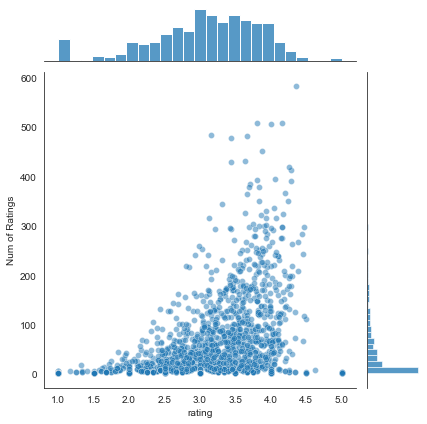

In [25]:
sns.jointplot(x = 'rating', y = 'Num of Ratings', data = ratings, alpha = 0.5)

## Creating Movie Recommendation

In [26]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

In [28]:
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ratings.sort_values('Num of Ratings', ascending = False).head()

,rating,Num of Ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [30]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [31]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

In [32]:
corr_of_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])

In [33]:
corr_of_starwars.dropna(inplace = True)

In [34]:
corr_of_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [35]:
corr_of_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [36]:
corr_of_starwars = corr_of_starwars.join(ratings['Num of Ratings'])
corr_of_starwars.head()

,Correlation,Num of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [37]:
corr_of_starwars[corr_of_starwars['Num of Ratings'] > 100].sort_values('Correlation', ascending = False)

,Correlation,Num of Ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Predict Function

In [38]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_of_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])
    corr_of_movie.dropna(inplace = True)
    
    corr_of_movie = corr_of_movie.join(ratings['Num of Ratings'])
    prediction = corr_of_movie[corr_of_movie['Num of Ratings'] > 100].sort_values('Correlation', ascending = False)
    
    return prediction

In [39]:
predictions = predict_movies('Titanic (1997)')

In [40]:
predictions.head()

,Correlation,Num of Ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
